# __`SVM Kernel`__

In [99]:
import numpy as np 
import matplotlib.pyplot as plt 

In [100]:
x = np.linspace(-5, 5, 100)
y = np.sqrt(10 ** 2 - x ** 2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [101]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

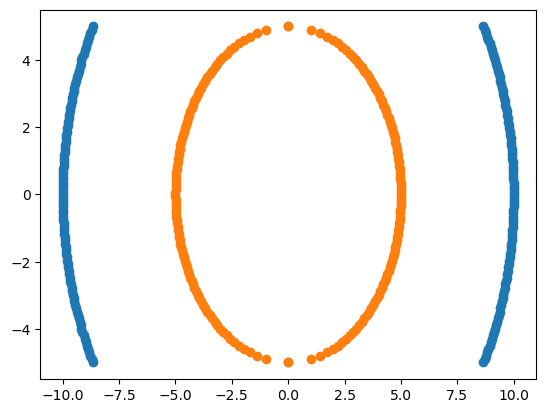

In [102]:
plt.scatter(y, x)
plt.scatter(y1, x1)
plt.show()

In [103]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1


In [104]:
### Independent and Dependent features
X = df.drop('Y', axis = 1)
y = df['Y']

X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


In [105]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, X_test.shape

((300, 2), (100, 2))

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

In [107]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.51

In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.59

## __`Polynomial Kernel`__

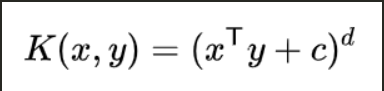

In [110]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [111]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, X_test.shape

((300, 5), (100, 5))

In [120]:
# Before Transformation
import plotly.express as px

fig = px.scatter_3d(df, x = 'X1', y = 'X2', z = 'X1*X2', color = 'Y')

fig.show()

In [114]:
# After transformation
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0